<a href="https://colab.research.google.com/github/hyunicecream/ML-DL/blob/main/SVM-(Iris_DATA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mglearn
import mglearn # 시각화
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [ ]:
iris = load_iris()

In [ ]:
# key값 확인
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
# 데이터 프레임 만들기
import pandas as pd
df = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
# 시각화를 위해 sepal length와 speal width만 사용한다.
# 이유 : 시각화를 용이하게 하기 위함이다.
# colume 0과 1만 사용함
# feature 2개만 사용해서 시각화를 하기위해, 더 넘어가면 시각화를 못함
x = iris.data[:, [0,1]] 
y = iris.target

In [ ]:
# 학습데이터를 구성한다
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2)

In [ ]:
# SVM으로 학습한다.
# model = SVC(kernel='linear') # 직선으로 경계를 찾는다.
model = SVC(kernel='rbf', gamma=1.0, C=0.5) # 곡선으로 경계를 찾는다.
model.fit(x_train, y_train)

SVC(C=0.5, gamma=1.0)

In [ ]:
print("* 학습용 데이터로 측정한 정확도 = %.2f" % model.score(x_train, y_train))
print()
print("* 시험용 데이터로 측정한 정확도 = %.2f" % model.score(x_test, y_test))

* 학습용 데이터로 측정한 정확도 = 0.83

* 시험용 데이터로 측정한 정확도 = 0.77


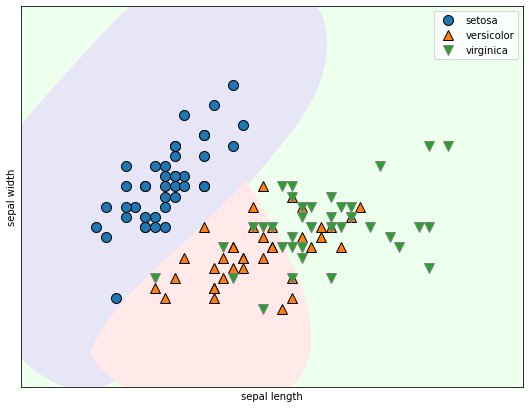

In [ ]:
# 시각화
plt.figure(figsize=[9,7])
mglearn.plots.plot_2d_classification(model, x_train, alpha=0.1)
mglearn.discrete_scatter(x_train[:,0], x_train[:,1], y_train)
plt.legend(iris.target_names)
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

***SVM(비선형) - Iris 데이터 학습 (Non-linear-SVM & multi-class classification)***

▪ Non-linear SVM (kernel trick)을 이용하여 iris 데이터의 sepal length와 sepal width feature만 학습한다

In [ ]:
iris = load_iris()
x = iris.data[:, [0, 1]]
y = iris.target

In [ ]:
trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.2)

In [ ]:
import numpy as np

# gamma와 C의 조합을 바꿔가면서 학습 데이터의 정확도가 최대인 조합을 찾는다.
optAcc = -999
optG = 0
optC = 0
for gamma in np.arange(0.1, 5.0, 0.1): 
  for c in np.arange(0.1, 5.0, 0.1):
        model = SVC(kernel='rbf', gamma=gamma, C=c)
        model.fit(trainX, trainY)
        acc = model.score(testX, testY)
  if acc > optAcc:
    optG = gamma   
    optC = c
    optAcc = acc
print('gamma = %.2f' % optG)
print('C = %.2f' % optC)

gamma = 0.10
C = 4.90


In [ ]:
# 최적 조건으로 학습한 결과를 확인한다.
model = SVC(kernel='rbf', gamma=optG, C=optC)
model.fit(trainX, trainY)

SVC(C=4.9, gamma=0.1)

In [ ]:
print("* 학습용 데이터로 측정한 정확도 = %.2f" % model.score(trainX, trainY))
print()
print("* 시험용 데이터로 측정한 정확도 = %.2f" % model.score(testX, testY))

* 학습용 데이터로 측정한 정확도 = 0.81

* 시험용 데이터로 측정한 정확도 = 0.87


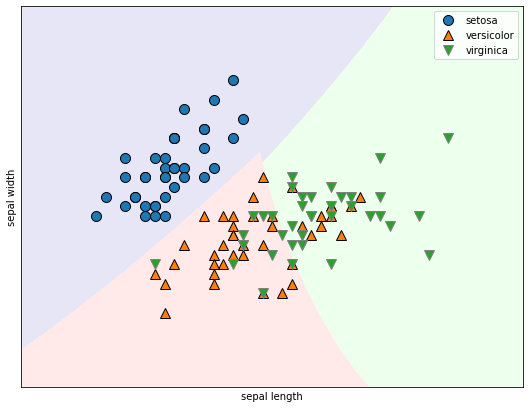

In [ ]:
# 시각화
plt.figure(figsize=[9,7])
mglearn.plots.plot_2d_classification(model, trainX, alpha=0.1)
mglearn.discrete_scatter(trainX[:,0], trainX[:,1], trainY)
plt.legend(iris.target_names)
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

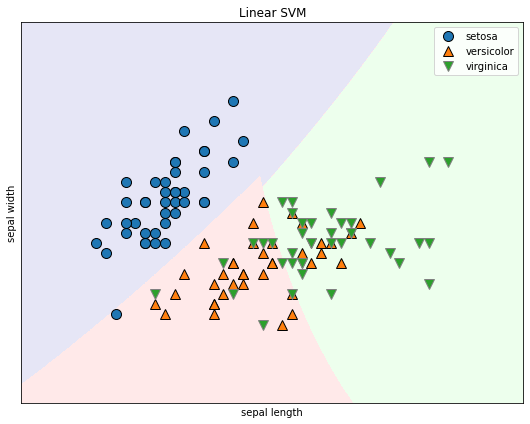

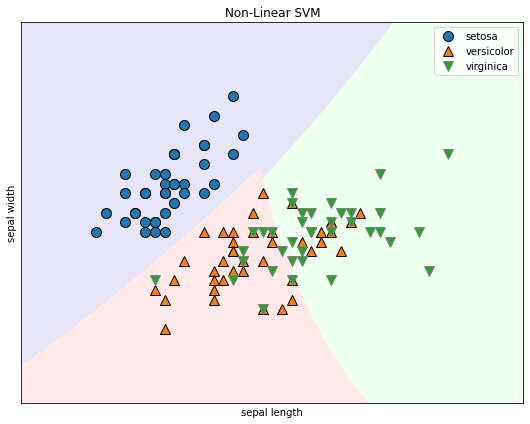

In [ ]:
# 선형SVM 시각화
plt.figure(figsize=[9,7])
mglearn.plots.plot_2d_classification(model, x_train, alpha=0.1)
mglearn.discrete_scatter(x_train[:,0], x_train[:,1], y_train)
plt.legend(iris.target_names)
plt.title("Linear SVM")
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

# 비선형SVM 시각화
plt.figure(figsize=[9,7])
mglearn.plots.plot_2d_classification(model, trainX, alpha=0.1)
mglearn.discrete_scatter(trainX[:,0], trainX[:,1], trainY)
plt.legend(iris.target_names)
plt.title("Non-Linear SVM")
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

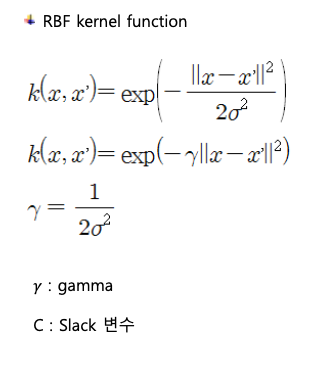